## Demo for Denoising Autoencoders

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import ipywidgets as widgets
from src import *
import torch
import torch.nn as nn
import torch.optim as optim

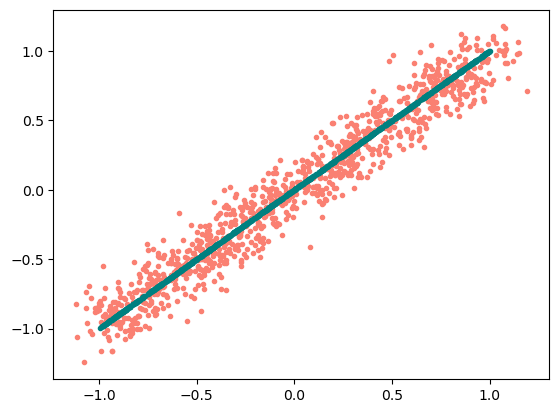

<Figure size 640x480 with 0 Axes>

In [2]:
x,y = gen_line(1000)
shape_name = "line"
x_c, y_c = corruption_process(x,y)
save_data(shape_name,x,y,x_c, y_c)
plot_data(shape_name,x,y,x_c,y_c)


In [5]:
X_train, y_train, X_test,  y_test = load_data(shape_name)

# loss metric and optimizer
model = Autoencoder()
#
hps = {
    'criterion': nn.MSELoss(),
    'learning_rate': 0.001,
    'optimizer': optim.Adam,
    'n_epochs': 75,
    'batch_size': 64
}


train = Trainer(model, hps)

train.training_loop(X_train, y_train, X_test,  y_test )

Training: 100%|██████████| 75/75 [00:00<00:00, 94.45it/s]

Epoch 74: Loss=0.00, Accuracy=47.7%


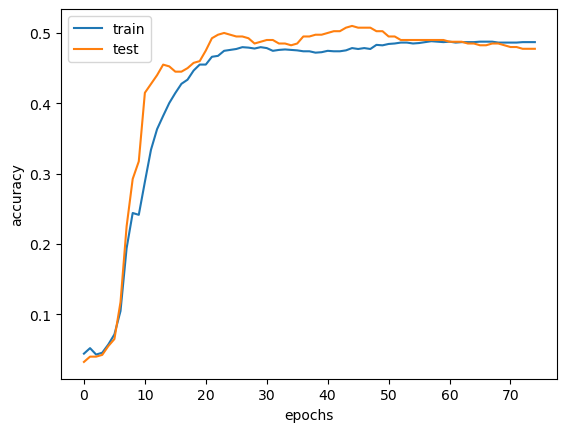

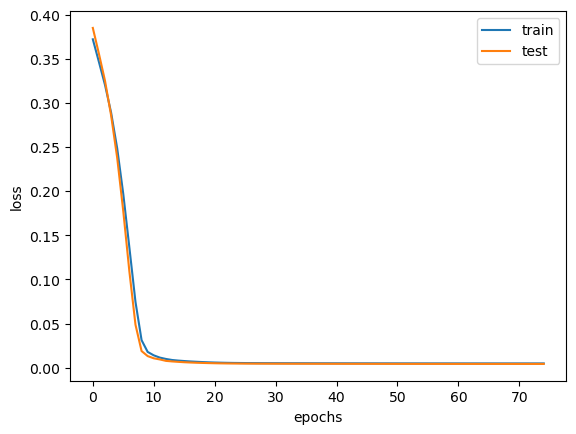

<Figure size 640x480 with 0 Axes>

In [6]:
plot_acc(train, shape_name)
plot_loss(train, shape_name)

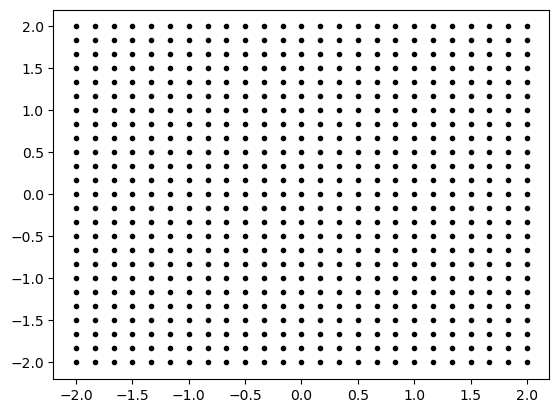

In [ ]:
grid = gen_grid_data(25)
plt.scatter(grid[:,0], grid[:,1], marker='.', c='black')

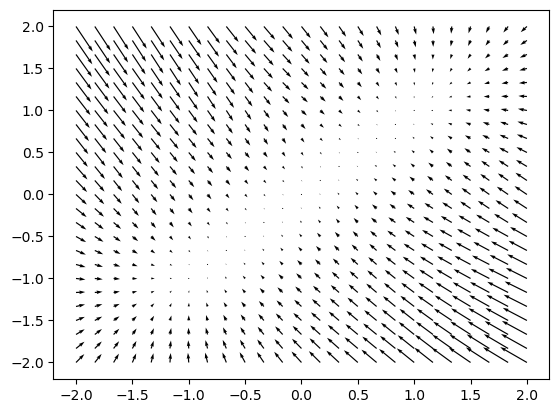

<Figure size 640x480 with 0 Axes>

In [ ]:

grid = gen_grid_data(25)

prediction = model(grid)
plot_vectorfield(shape_name, grid, prediction)
